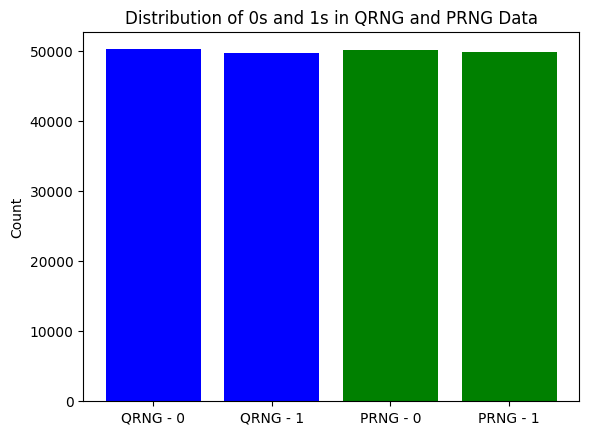

Training data successfully generated with 1000 bits per sample and saved to 1000qb_qwerty.txt.


In [8]:
# Working Quantum Circuit using AerSimulator
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import math
import random

# Create a quantum circuit with Hadamard gates to put all qubits in superposition
def create_qrng_circuit(num_qubits):
    circ = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        circ.h(i)  # Apply Hadamard gate to each qubit
    circ.measure_all()  # Measure all qubits
    return circ

# Function to run the QRNG on a Qiskit simulator
def run_qrng_on_simulator(qc, shots=100, total_num_bits_required=100):
    # Use the Qiskit Aer simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(qc, simulator)

    qrng_data = []
    for _ in range(shots):
        bits = ''
        while len(bits) < total_num_bits_required:
            # Run the transpiled circuit on the simulator
            job = simulator.run(transpiled_circuit, shots=1)
            # Get the counts (measurement results)
            counts = job.result().get_counts()
            # Get the measured bitstring
            bitstring = list(counts.keys())[0]
            bits += bitstring[::-1]  # Reverse the bitstring to match qubit order
        # Truncate the bits to the required length
        bits = bits[:total_num_bits_required]
        qrng_data.append(bits)
    return qrng_data

# Function to generate PRNG data
def generate_prng_data(num_samples, num_bits_per_sample):
    prng_data = []
    for _ in range(num_samples):
        bits = ''.join(np.random.choice(['0', '1'], size=num_bits_per_sample))
        prng_data.append(bits)
    return prng_data

# Combine QRNG and PRNG data into the training format
def combine_qrng_prng_data(qrng_data, prng_data):
    combined_data = []
    for binary_string in qrng_data:
        combined_data.append(f"{binary_string} 1")  # Label 1 for QRNG
    for binary_string in prng_data:
        combined_data.append(f"{binary_string} 2")  # Label 2 for PRNG
    return combined_data

# Plot histogram of the bit distribution
def plot_histogram(qrng_data, prng_data):
    # Flatten the lists into one long string of bits
    qrng_bits = ''.join(qrng_data)
    prng_bits = ''.join(prng_data)

    # Count occurrences of '0' and '1'
    qrng_zeros = qrng_bits.count('0')
    qrng_ones = qrng_bits.count('1')
    prng_zeros = prng_bits.count('0')
    prng_ones = prng_bits.count('1')

    # Plot the histogram
    labels = ['QRNG - 0', 'QRNG - 1', 'PRNG - 0', 'PRNG - 1']
    values = [qrng_zeros, qrng_ones, prng_zeros, prng_ones]

    plt.bar(labels, values, color=['blue', 'blue', 'green', 'green'])
    plt.ylabel('Count')
    plt.title('Distribution of 0s and 1s in QRNG and PRNG Data')
    plt.show()

# Write the combined data to a file
def write_data_to_file(data, filename):
    with open(filename, 'w') as file:
        for entry in data:
            file.write(entry + '\n')

# Main flow
if __name__ == '__main__':
    # Set maximum number of qubits per run (limited by AerSimulator)
    num_qubits_per_run = 30

    # Choose a random total number of bits required for each sample between 100 and 1000
    #total_num_bits_required = random.randint(100, 1000)
    total_num_bits_required = 1000
    
    # Generate QRNG data
    qrng_circuit = create_qrng_circuit(num_qubits_per_run)
    qrng_data = run_qrng_on_simulator(qrng_circuit, shots=100, total_num_bits_required=total_num_bits_required)

    # Generate PRNG data
    prng_data = generate_prng_data(num_samples=100, num_bits_per_sample=total_num_bits_required)

    # Combine QRNG and PRNG data
    combined_data = combine_qrng_prng_data(qrng_data, prng_data)

    # Write the combined data to a file
    name = f'{total_num_bits_required}qb_qwerty.txt'
    
    write_data_to_file(combined_data, name)

    # Plot histogram of the data
    plot_histogram(qrng_data, prng_data)

    print(f"Training data successfully generated with {total_num_bits_required} bits per sample and saved to {name}.")
